In [184]:
import numpy as np 
import pandas as pd

In [185]:
data=pd.read_csv("wine-clustering.csv")
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [186]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [187]:
data.head()
selected_features=data[['OD280','Alcohol']]

In [188]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
scalar.fit_transform(selected_features)

array([[0.97069597, 0.84210526],
       [0.78021978, 0.57105263],
       [0.6959707 , 0.56052632],
       [0.7985348 , 0.87894737],
       [0.60805861, 0.58157895],
       [0.57875458, 0.83421053],
       [0.84615385, 0.88421053],
       [0.84615385, 0.79736842],
       [0.57875458, 1.        ],
       [0.83516484, 0.74473684],
       [0.6959707 , 0.80789474],
       [0.56776557, 0.81315789],
       [0.5970696 , 0.71578947],
       [0.53479853, 0.97894737],
       [0.63369963, 0.88157895],
       [0.58974359, 0.68421053],
       [0.50549451, 0.86052632],
       [0.47619048, 0.73684211],
       [0.56776557, 0.83157895],
       [0.76556777, 0.68684211],
       [0.89377289, 0.79736842],
       [0.82417582, 0.5       ],
       [1.        , 0.70526316],
       [0.86446886, 0.47894737],
       [0.93406593, 0.65      ],
       [0.70695971, 0.53157895],
       [0.71428571, 0.62105263],
       [0.54945055, 0.59736842],
       [0.78021978, 0.74736842],
       [0.84981685, 0.78684211],
       [0.

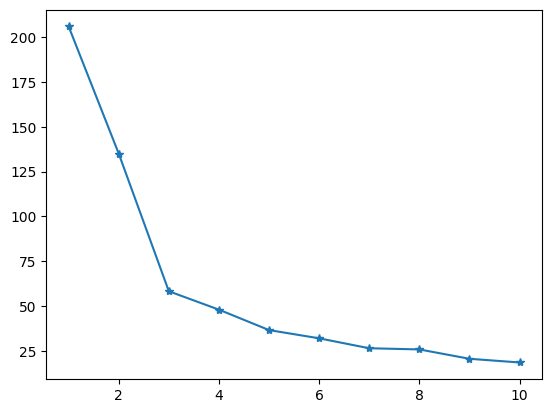

In [189]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=42,n_init='auto')
    kmeans.fit(selected_features)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss,marker='*')
plt.show()

In [190]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,random_state=42,n_init='auto')
kmeans.fit(selected_features)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [191]:
y_pred=kmeans.fit_predict(selected_features)

In [192]:
print(kmeans.cluster_centers_)

[[ 2.90290909 12.07981818]
 [ 1.73741379 13.07413793]
 [ 3.14538462 13.71415385]]


In [193]:
from sklearn.metrics import silhouette_score
silhouette_score(selected_features,kmeans.labels_)

0.49865025538089525

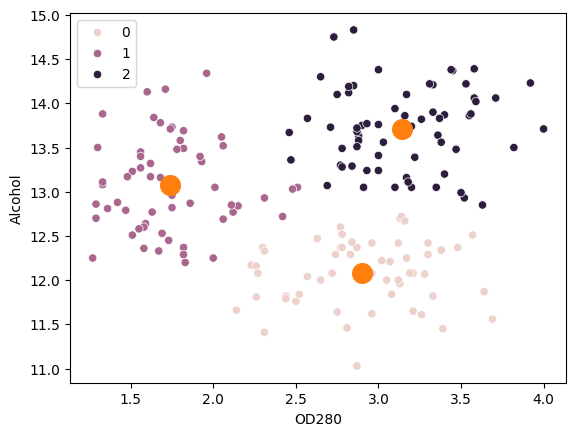

In [194]:
import seaborn as sns
sns.scatterplot(x=selected_features['OD280'],y=selected_features['Alcohol'],hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200)